# Problem Statement 
The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

In this challenge, we ask you to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).

## Importing Data

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# Data wrangling


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
df.drop('Name',axis=1)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,male,26.0,0,0,111369,30.0000,C148,C


In [7]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
print("No. of null values in Age = ",df['Age'].isnull().sum())
print("No. of null values in cabin = ",df['Cabin'].isnull().sum())
print("No. of null values in Embarked = ",df['Embarked'].isnull().sum())


No. of null values in Age =  177
No. of null values in cabin =  687
No. of null values in Embarked =  2


In [11]:
median = df["Age"].median()
df['Age'].replace(np.nan,median,inplace=True)

In [12]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [13]:
df.drop('PassengerId', axis=1)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,NaN,S
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [14]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [15]:
df.drop('Cabin',axis=1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [16]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [17]:
df['Embarked'].replace(np.nan,0)

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 891, dtype: object

In [18]:
df['Embarked'].isnull().sum()

2

In [19]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [20]:
df.drop('Ticket',axis=1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,30.0000,C148,C


In [21]:
df=df.dropna()

In [22]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


In [23]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [24]:
df.notnull().sum()

PassengerId    202
Survived       202
Pclass         202
Name           202
Sex            202
Age            202
SibSp          202
Parch          202
Ticket         202
Fare           202
Cabin          202
Embarked       202
dtype: int64

Here our data is totally cleaned and is ready to preprocess

In [25]:
df._get_numeric_data()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
1,2,1,1,38.0,1,0,71.2833
3,4,1,1,35.0,1,0,53.1000
6,7,0,1,54.0,0,0,51.8625
10,11,1,3,4.0,1,1,16.7000
11,12,1,1,58.0,0,0,26.5500
...,...,...,...,...,...,...,...
871,872,1,1,47.0,1,1,52.5542
872,873,0,1,33.0,0,0,5.0000
879,880,1,1,56.0,0,1,83.1583
887,888,1,1,19.0,0,0,30.0000


# Exploratory Data Analysis


### Pclass

Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd

In [26]:
df['Pclass'].head()

1     1
3     1
6     1
10    3
11    1
Name: Pclass, dtype: int64

In [27]:
df['Pclass'].value_counts().to_frame()

,Pclass
1,174
2,16
3,12


In [28]:
df['Pclass'].describe()

count    202.000000
mean       1.198020
std        0.528205
min        1.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        3.000000
Name: Pclass, dtype: float64

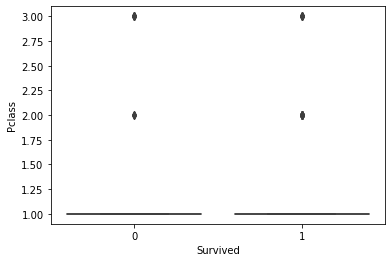

In [29]:
sns.boxplot(x="Survived",y="Pclass",data=df)

# Age

In [30]:
df["Age"].head()

1     38.0
3     35.0
6     54.0
10     4.0
11    58.0
Name: Age, dtype: float64

In [31]:
df.corr()['Survived'].sort_values()


Age           -0.228967
Pclass        -0.030513
Parch          0.042456
PassengerId    0.111985
Fare           0.128261
SibSp          0.138202
Survived       1.000000
Name: Survived, dtype: float64

In [32]:
df["Age"].value_counts().to_frame()

,Age
28.00,21
36.00,11
24.00,9
35.00,6
19.00,6
...,...
62.00,1
14.00,1
63.00,1
41.00,1


In [33]:
df['Age'].describe()

count    202.000000
mean      34.952574
std       15.054584
min        0.920000
25%       25.000000
50%       33.500000
75%       46.750000
max       80.000000
Name: Age, dtype: float64

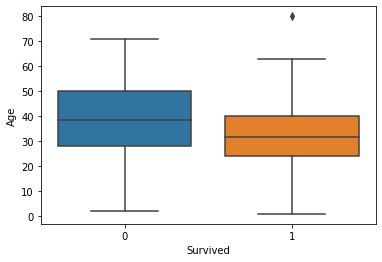

In [34]:
sns.boxplot(x="Survived", y="Age", data=df)

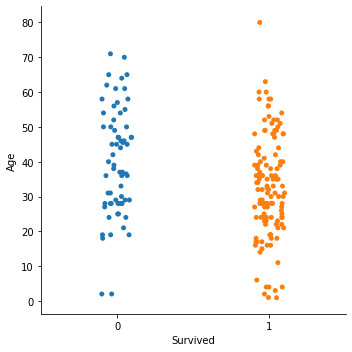

In [35]:
sns.catplot(x="Survived",y="Age",data=df)

In [36]:
from scipy import stats
stats.zscore(df[['Age']],axis=1).sum()

C:\Users\Rajat\Anaconda3\lib\site-packages\scipy\stats\stats.py:2313: RuntimeWarning: invalid value encountered in true_divide
  np.expand_dims(sstd, axis=axis))


nan

## Sex

In [37]:
df['Sex'].head()

1     female
3     female
6       male
10    female
11    female
Name: Sex, dtype: object

In [38]:
df['Sex'].value_counts().to_frame()

,Sex
male,107
female,95


In [39]:
df["Sex"].describe()

count      202
unique       2
top       male
freq       107
Name: Sex, dtype: object

In [40]:
df["Sex"].dtype

dtype('O')

In [41]:
df['Sex'].replace(to_replace=['male', 'female'], value=[0, 1],inplace=True )



C:\Users\Rajat\Anaconda3\lib\site-packages\pandas\core\generic.py:6786: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


## Sib\Sp

### no. of siblings / spouses aboard the Titanic

In [42]:
df["SibSp"].head()

1     1
3     1
6     0
10    1
11    0
Name: SibSp, dtype: int64

In [43]:
df["SibSp"].describe()

count    202.000000
mean       0.445545
std        0.630490
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        3.000000
Name: SibSp, dtype: float64

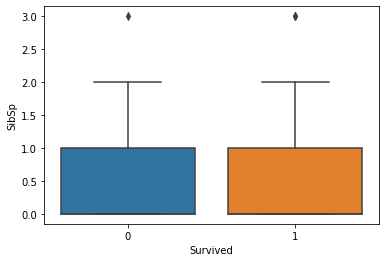

In [44]:
sns.boxplot(x='Survived',y='SibSp',data=df)

In [45]:
df['SibSp'].value_counts().to_frame()

,SibSp
0,124
1,69
2,6
3,3


## Parch
### No. of parents / children aboard the Titanic

In [46]:
df["Parch"].head()

1     0
3     0
6     0
10    1
11    0
Name: Parch, dtype: int64

In [47]:
df["Parch"].describe()

count    202.000000
mean       0.440594
std        0.732294
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        4.000000
Name: Parch, dtype: float64

In [48]:
df["Parch"].value_counts().to_frame()

,Parch
0,139
1,39
2,23
4,1


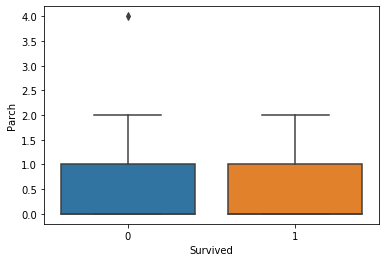

In [49]:
sns.boxplot(x='Survived',y='Parch',data=df)

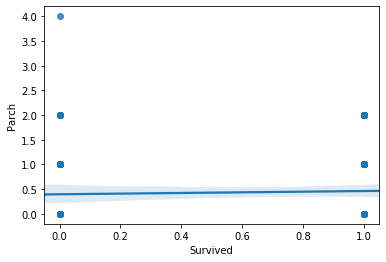

In [50]:
sns.regplot(x='Survived',y='Parch',data=df)

# fare

In [51]:
df["Fare"].head()

1     71.2833
3     53.1000
6     51.8625
10    16.7000
11    26.5500
Name: Fare, dtype: float64

In [52]:
df["Fare"].describe()

count    202.000000
mean      76.103301
std       74.759941
min        0.000000
25%       28.959375
50%       55.000000
75%       89.776050
max      512.329200
Name: Fare, dtype: float64

In [53]:
df["Fare"].value_counts().to_frame()

,Fare
26.5500,8
30.0000,5
53.1000,5
52.0000,5
10.5000,4
...,...
71.2833,1
32.3208,1
13.7917,1
221.7792,1


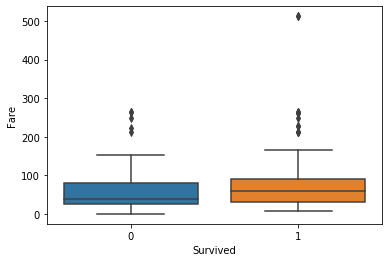

In [54]:
sns.boxplot(x='Survived',y='Fare',data=df)

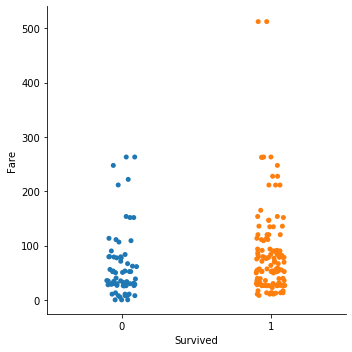

In [55]:
sns.catplot(x='Survived',y='Fare',data=df)

In [56]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",0,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",1,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",1,58.0,0,0,113783,26.5500,C103,S
...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",1,47.0,1,1,11751,52.5542,D35,S
872,873,0,1,"Carlsson, Mr. Frans Olof",0,33.0,0,0,695,5.0000,B51 B53 B55,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",1,56.0,0,1,11767,83.1583,C50,C
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.0,0,0,112053,30.0000,B42,S


## Embarked
#### Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton

In [57]:
df['Embarked'].head()

1     C
3     S
6     S
10    S
11    S
Name: Embarked, dtype: object

In [58]:
df['Embarked'].describe()

count     202
unique      3
top         S
freq      129
Name: Embarked, dtype: object

In [59]:
df["Embarked"].value_counts().to_frame()

,Embarked
S,129
C,69
Q,4


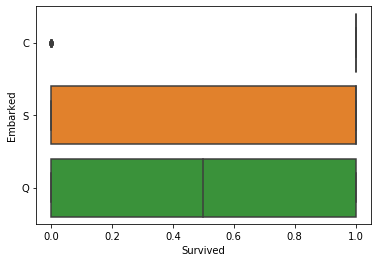

In [60]:
sns.boxplot(x='Survived',y='Embarked',data=df)

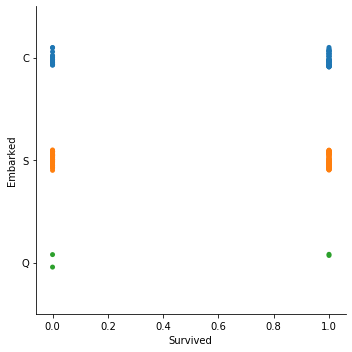

In [61]:
sns.catplot(x='Survived',y='Embarked', data=df)

# Model Development

Text(0.5, 1, 'Missing values in the Titanic dataset')

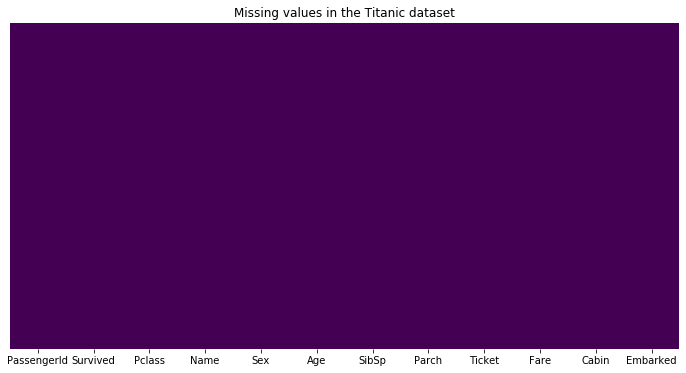

In [62]:
fig, ax = plt.subplots(figsize=(12,6))
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis', ax=ax)
ax.set_ylabel('')
ax.set_title('Missing values in the Titanic dataset')

Text(0.5, 0, '')

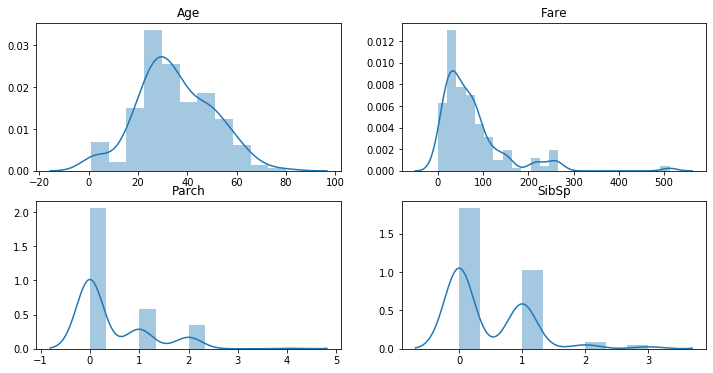

In [63]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(12,6))
sns.distplot(df["Age"].dropna(), ax=ax1)
ax1.set_title('Age')
ax1.set_xlabel('')
sns.distplot(df["Fare"].dropna(), ax=ax2)
ax2.set_title('Fare')
ax2.set_xlabel('')
sns.distplot(df["Parch"].dropna(), ax=ax3)
ax3.set_title('Parch')
ax3.set_xlabel('')
sns.distplot(df["SibSp"].dropna(), ax=ax4)
ax4.set_title('SibSp')
ax4.set_xlabel('')

#### Removing outliers

In [64]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)


PassengerId    418.250000
Survived         1.000000
Pclass           0.000000
Sex              1.000000
Age             21.750000
SibSp            1.000000
Parch            1.000000
Fare            60.816675
dtype: float64


In [65]:
df.shape

(202, 12)

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 202 entries, 1 to 889
Data columns (total 12 columns):
PassengerId    202 non-null int64
Survived       202 non-null int64
Pclass         202 non-null int64
Name           202 non-null object
Sex            202 non-null int64
Age            202 non-null float64
SibSp          202 non-null int64
Parch          202 non-null int64
Ticket         202 non-null object
Fare           202 non-null float64
Cabin          202 non-null object
Embarked       202 non-null object
dtypes: float64(2), int64(6), object(4)
memory usage: 30.5+ KB


In [67]:
df['Pclass'].median()

1.0

#### Here we can see that removing outliers will get lot of data deleted , so we will replace outliers by median 

In [68]:
df_out = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
print(df_out.shape)

(156, 12)


In [69]:
print(df['Pclass'].quantile(0.50)) 
print(df['Pclass'].quantile(0.95)) 
df['Pclass'] = np.where(df['Pclass'] > 3, 3, df['Pclass'])
df.describe()


1.0
3.0


C:\Users\Rajat\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
count,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000
mean,455.495050,0.663366,1.198020,0.470297,34.952574,0.445545,0.440594,76.103301
std,249.704228,0.473732,0.528205,0.500357,15.054584,0.630490,0.732294,74.759941
min,2.000000,0.000000,1.000000,0.000000,0.920000,0.000000,0.000000,0.000000
25%,263.250000,0.000000,1.000000,0.000000,25.000000,0.000000,0.000000,28.959375
50%,457.500000,1.000000,1.000000,0.000000,33.500000,0.000000,0.000000,55.000000
75%,681.500000,1.000000,1.000000,1.000000,46.750000,1.000000,1.000000,89.776050
max,890.000000,1.000000,3.000000,1.000000,80.000000,3.000000,4.000000,512.329200


In [70]:
print(df['Age'].quantile(0.50)) 
print(df['Age'].quantile(0.95)) 
df['Age'] = np.where(df['Age'] > 54, 28, df['Age'])
df.describe()


33.5
60.0


C:\Users\Rajat\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
count,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000
mean,455.495050,0.663366,1.198020,0.470297,31.309010,0.445545,0.440594,76.103301
std,249.704228,0.473732,0.528205,0.500357,11.745067,0.630490,0.732294,74.759941
min,2.000000,0.000000,1.000000,0.000000,0.920000,0.000000,0.000000,0.000000
25%,263.250000,0.000000,1.000000,0.000000,25.000000,0.000000,0.000000,28.959375
50%,457.500000,1.000000,1.000000,0.000000,28.500000,0.000000,0.000000,55.000000
75%,681.500000,1.000000,1.000000,1.000000,39.000000,1.000000,1.000000,89.776050
max,890.000000,1.000000,3.000000,1.000000,54.000000,3.000000,4.000000,512.329200


In [71]:
print(df['SibSp'].quantile(0.50)) 
print(df['SibSp'].quantile(0.95)) 
df['SibSp'] = np.where(df['SibSp'] > 3.0, 0.0, df['SibSp'])
df.describe()


0.0
1.0


C:\Users\Rajat\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
count,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000
mean,455.495050,0.663366,1.198020,0.470297,31.309010,0.445545,0.440594,76.103301
std,249.704228,0.473732,0.528205,0.500357,11.745067,0.630490,0.732294,74.759941
min,2.000000,0.000000,1.000000,0.000000,0.920000,0.000000,0.000000,0.000000
25%,263.250000,0.000000,1.000000,0.000000,25.000000,0.000000,0.000000,28.959375
50%,457.500000,1.000000,1.000000,0.000000,28.500000,0.000000,0.000000,55.000000
75%,681.500000,1.000000,1.000000,1.000000,39.000000,1.000000,1.000000,89.776050
max,890.000000,1.000000,3.000000,1.000000,54.000000,3.000000,4.000000,512.329200


In [72]:
print(df['Parch'].quantile(0.50)) 
print(df['Parch'].quantile(0.95)) 
df['Parch'] = np.where(df['Parch'] > 2.0, 0.0, df['Parch'])
df.describe()


0.0
2.0


C:\Users\Rajat\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
count,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000
mean,455.495050,0.663366,1.198020,0.470297,31.309010,0.445545,0.420792,76.103301
std,249.704228,0.473732,0.528205,0.500357,11.745067,0.630490,0.688327,74.759941
min,2.000000,0.000000,1.000000,0.000000,0.920000,0.000000,0.000000,0.000000
25%,263.250000,0.000000,1.000000,0.000000,25.000000,0.000000,0.000000,28.959375
50%,457.500000,1.000000,1.000000,0.000000,28.500000,0.000000,0.000000,55.000000
75%,681.500000,1.000000,1.000000,1.000000,39.000000,1.000000,1.000000,89.776050
max,890.000000,1.000000,3.000000,1.000000,54.000000,3.000000,2.000000,512.329200


In [73]:
print(df['Fare'].quantile(0.50)) 
print(df['Fare'].quantile(0.95)) 
df['Fare'] = np.where(df['Fare'] > 112.07915, 14.4542, df['Fare'])
df.describe()


55.0
227.525


C:\Users\Rajat\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
count,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000
mean,455.495050,0.663366,1.198020,0.470297,31.309010,0.445545,0.420792,42.355659
std,249.704228,0.473732,0.528205,0.500357,11.745067,0.630490,0.688327,28.792489
min,2.000000,0.000000,1.000000,0.000000,0.920000,0.000000,0.000000,0.000000
25%,263.250000,0.000000,1.000000,0.000000,25.000000,0.000000,0.000000,14.454200
50%,457.500000,1.000000,1.000000,0.000000,28.500000,0.000000,0.000000,30.847900
75%,681.500000,1.000000,1.000000,1.000000,39.000000,1.000000,1.000000,65.789575
max,890.000000,1.000000,3.000000,1.000000,54.000000,3.000000,2.000000,110.883300



## Model Development 

In [74]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1.0,0.0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1.0,0.0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",0,54.0,0.0,0.0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",1,4.0,1.0,1.0,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",1,28.0,0.0,0.0,113783,26.5500,C103,S
...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",1,47.0,1.0,1.0,11751,52.5542,D35,S
872,873,0,1,"Carlsson, Mr. Frans Olof",0,33.0,0.0,0.0,695,5.0000,B51 B53 B55,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",1,28.0,0.0,1.0,11767,83.1583,C50,C
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.0,0.0,0.0,112053,30.0000,B42,S


In [75]:
df.drop('Name',axis=1)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,1,38.0,1.0,0.0,PC 17599,71.2833,C85,C
3,4,1,1,1,35.0,1.0,0.0,113803,53.1000,C123,S
6,7,0,1,0,54.0,0.0,0.0,17463,51.8625,E46,S
10,11,1,3,1,4.0,1.0,1.0,PP 9549,16.7000,G6,S
11,12,1,1,1,28.0,0.0,0.0,113783,26.5500,C103,S
...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,1,47.0,1.0,1.0,11751,52.5542,D35,S
872,873,0,1,0,33.0,0.0,0.0,695,5.0000,B51 B53 B55,S
879,880,1,1,1,28.0,0.0,1.0,11767,83.1583,C50,C
887,888,1,1,1,19.0,0.0,0.0,112053,30.0000,B42,S


In [76]:
features= ['Pclass','Sex','Age','SibSp','Parch', 'Fare']
X= df[features]

y=df['Survived']

## Logistic Regression

In [77]:
from sklearn.model_selection import train_test_split

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=1 )

In [79]:
X_train.shape[0]



141

In [80]:
from sklearn.linear_model import LogisticRegression

In [81]:
from sklearn.metrics import accuracy_score

In [82]:
model=LogisticRegression()

In [83]:
model.fit(X_train,y_train)
prediction = model.predict(X_test)

C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [84]:
accuracy_score(y_test, prediction)

0.7049180327868853

# RandomForest

In [85]:
from sklearn.ensemble import RandomForestClassifier

In [86]:
rfc = RandomForestClassifier()

In [87]:
rfc.fit(X_train,y_train)
rfc_predict = rfc.predict(X_test)

C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [88]:
accuracy_score(y_test,rfc_predict)

0.7540983606557377

In [89]:
from xgboost import XGBClassifier

In [90]:
model = XGBClassifier()
model.fit(X_train,y_train)
prediction = model.predict(X_test)

In [91]:
accuracy_score(y_test,prediction)

0.7377049180327869

In [93]:
df1=pd.read_csv('test.csv')